In [273]:
import pandas as pd
import numpy as np
import os
os.getcwd()
data = pd.read_csv("Data-prod.csv",sep=',')

C:\Users\kulka\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [281]:
data.head()

,SalesOrderID,RevisionNumber,delayed,OnlineOrderFlag,CustomerID,SalesPersonID,CreditCardID,SubTotal,TaxAmt,Freight,...,weights,DaysToManufacture,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,Title,Suffix,EmailPromotion
0,43659,8,1,0,29825,279.0,16281.0,20565.6206,1971.5149,616.0984,...,20.77,4,M,H,U,1,19,NaN,NaN,0.0
1,43659,8,1,0,29825,279.0,16281.0,20565.6206,1971.5149,616.0984,...,21.13,4,M,H,U,1,19,NaN,NaN,0.0
2,43659,8,1,0,29825,279.0,16281.0,20565.6206,1971.5149,616.0984,...,21.42,4,M,H,U,1,19,NaN,NaN,0.0
3,43659,8,1,0,29825,279.0,16281.0,20565.6206,1971.5149,616.0984,...,20.35,4,M,H,U,1,19,NaN,NaN,0.0
4,43659,8,1,0,29825,279.0,16281.0,20565.6206,1971.5149,616.0984,...,20.77,4,M,H,U,1,19,NaN,NaN,0.0


In [296]:
x = data[data.ProductID == 873]
x.Name

35769     Patch Kit/8 Patches
35874     Patch Kit/8 Patches
36061     Patch Kit/8 Patches
36209     Patch Kit/8 Patches
36284     Patch Kit/8 Patches
36329     Patch Kit/8 Patches
36483     Patch Kit/8 Patches
36517     Patch Kit/8 Patches
36610     Patch Kit/8 Patches
36865     Patch Kit/8 Patches
36998     Patch Kit/8 Patches
37081     Patch Kit/8 Patches
37197     Patch Kit/8 Patches
37232     Patch Kit/8 Patches
37320     Patch Kit/8 Patches
37412     Patch Kit/8 Patches
37521     Patch Kit/8 Patches
37538     Patch Kit/8 Patches
37595     Patch Kit/8 Patches
37666     Patch Kit/8 Patches
37690     Patch Kit/8 Patches
37869     Patch Kit/8 Patches
37908     Patch Kit/8 Patches
37927     Patch Kit/8 Patches
37937     Patch Kit/8 Patches
37959     Patch Kit/8 Patches
38013     Patch Kit/8 Patches
38047     Patch Kit/8 Patches
38058     Patch Kit/8 Patches
38064     Patch Kit/8 Patches
                 ...         
120834    Patch Kit/8 Patches
120891    Patch Kit/8 Patches
120898    

In [282]:
data.RevisionNumber.value_counts()

8    121203
9       114
Name: RevisionNumber, dtype: int64

In [283]:
data.delayed = np.where(data.delayed == -11,1,data.delayed)
data.delayed.value_counts()
# Almost Half of the products sales where shipped late, ie: more than 1 month

1    66265
0    55052
Name: delayed, dtype: int64

In [284]:
data.OnlineOrderFlag.value_counts()
# Almost half of the products sales where ordered online

0    60919
1    60398
Name: OnlineOrderFlag, dtype: int64

In [285]:
pd.crosstab(data.delayed, data.OnlineOrderFlag)
# delay is irrespective of Online order 

OnlineOrderFlag,0,1
delayed,,
0,8522,46530
1,52397,13868


In [286]:
# Maximum amount spent on a single sales
print("max of Sub total {}".format(data.SubTotal.max()))
data[["CustomerID","SubTotal"]].sort("SubTotal").tail(1) # Customer with ID = 29641 makes the maximum sales.
# Maximum amount spent on a single sales
print("min of Sub total {}".format(data.SubTotal.min()))

max of Sub total 163930.3943
min of Sub total 1.374


C:\Users\kulka\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


In [187]:
data.ProductID.value_counts() # sales for product number 780, 712, 873, 921,711 are high

870    2463
712    2139
711    1891
708    1881
707    1862
873    1772
921    1613
715    1281
922    1236
878    1100
871    1018
782     928
714     892
783     876
872     874
716     829
784     800
779     797
781     788
780     779
877     775
923     729
859     727
930     716
770     703
762     688
760     678
763     648
765     641
761     637
       ... 
941      64
723      52
913      49
727      48
839      47
828      46
805      46
710      44
733      44
719      44
914      43
890      40
891      40
915      38
888      33
830      33
827      31
946      30
887      29
950      28
902      20
919      16
903      14
744      13
898       9
927       9
943       6
911       6
942       5
897       2
Name: ProductID, dtype: int64

Most of the products where sold in the range of $0-$250


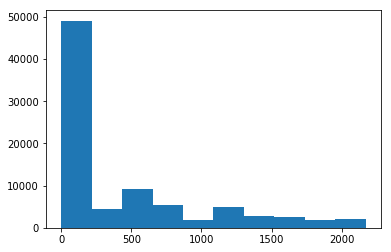

In [188]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(data.StandardCost)
print("Most of the products where sold in the range of $0-$250")

In [287]:
a = data[data.UnitPrice == data.UnitPrice.max()]
a.ProductID.value_counts() # The costrlies products include product id = 337, 336, 302, 295, 281
a.ProductLine.value_counts() # all the costly products are shipped using road
a.MakeFlag.value_counts()# Costly Products are manufactured in-house.
a.SafetyStockLevel.value_counts() # Safety stock leavel for costly products is 100
a.ReorderPoint.value_counts() # Reorder point for costly products is 75
a.DaysToManufacture.value_counts() # costly products take more time to manufacture
a.Class.value_counts() # Class of costly products is High
a.Style.value_counts() # Universal products are costly
a.ProductSubcategoryID.value_counts() # the products from Subcategory 1551 are costly
b = data[data.UnitPrice == data.UnitPrice.min()]
print(b.ProductID) # 873 is the cheapest product
b.MakeFlag.value_counts() # cheap products are not-manufactured inhouse
# Cheap products are made standard shipping
b.SafetyStockLevel.value_counts() # Safety stock level for cheap products is 1
b.ReorderPoint.value_counts() # Reorder point for cheap products is 3
b.DaysToManufacture.value_counts() # cheap products take less time to manufacture
b.Class # Class for cheap products is Low

42243    873
Name: ProductID, dtype: int64


42243    NaN
Name: Class, dtype: object

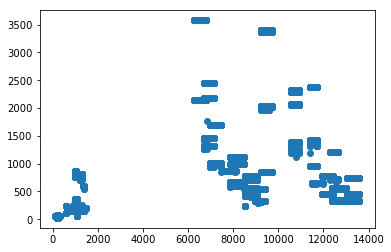

In [190]:
# plot weight and unit price
plt.scatter(data.weights,data.UnitPrice,)

In [191]:
pd.crosstab(data.ProductSubcategoryID, data.EmailPromotion)

EmailPromotion,0.0,1.0,2.0
ProductSubcategoryID,,,
1,5012,2502,1907
2,9817,4401,3230
3,2119,997,714
4,684,326,268
5,141,55,45
6,159,61,43
7,97,34,30
8,163,65,54
9,161,57,45


In [192]:
pd.crosstab(data.EmailPromotion, data.Title)

Title,Mr.,Ms,Ms.,Sr.,Sra.
EmailPromotion,,,,,
0.0,16562,2,11001,257,112
1.0,7439,0,5641,41,6
2.0,5298,0,4123,49,0


In [193]:
pd.crosstab(data.Title, data.Class)
# most of the shopping was done by Mr and Ms.

Class,H,L,M
Title,,,
Mr.,7245,8003,5079
Ms,1,0,0
Ms.,5357,5668,3590
Sr.,94,87,67
Sra.,31,30,8


In [194]:
data.delayed = np.where(data.delayed == -11, 1, data.delayed)

In [195]:
data.columns

Index(['SalesOrderID', 'RevisionNumber', 'delayed', 'OnlineOrderFlag',
       'CustomerID', 'SalesPersonID', 'CreditCardID', 'SubTotal', 'TaxAmt',
       'Freight', 'TotalDue', 'SalesOrderDetailID', 'OrderQty', 'ProductID',
       'SpecialOfferID', 'UnitPrice', 'UnitPriceDiscount', 'LineTotal', 'Name',
       'ProductNumber', 'MakeFlag', 'FinishedGoodsFlag', 'Color',
       'SafetyStockLevel', 'ReorderPoint', 'StandardCost', 'ListPrice', 'Size',
       'SizeUnitMeasureCode', 'WeightUnitMeasureCode', 'weights',
       'DaysToManufacture', 'ProductLine', 'Class', 'Style',
       'ProductSubcategoryID', 'ProductModelID', 'Title', 'Suffix',
       'EmailPromotion', 'cluster'],
      dtype='object')

(array([ 30443.,  31172.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  22833.]),
 array([   4. ,   53.6,  103.2,  152.8,  202.4,  252. ,  301.6,  351.2,
         400.8,  450.4,  500. ]),
 <a list of 10 Patch objects>)

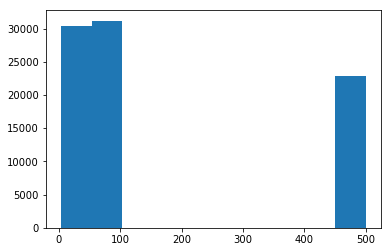

In [196]:
plt.hist(data.SafetyStockLevel)

Most of the products where manufactured in 1 day and they are assesories


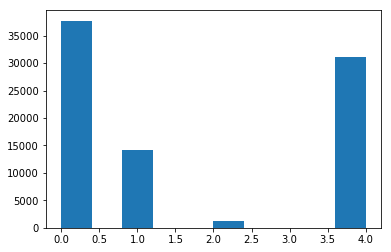

In [197]:
plt.hist(data.DaysToManufacture)
print("Most of the products where manufactured in 1 day and they are assesories")

In [198]:
print("Some of the weight is measued in LB and some in grams")
print("We have standardize the data, so lets make everything in grams")
data.weights = np.where(data.WeightUnitMeasureCode == 'LB ', data.weights * 453, data.weights)

Some of the weight is measued in LB and some in grams
We have standardize the data, so lets make everything in grams


In [199]:
print("Accessories are manufacture in 1 day, Bikes take maximum 4 days")
pd.crosstab(data.ProductSubcategoryID,data.DaysToManufacture)

Accessories are manufacture in 1 day, Bikes take maximum 4 days


DaysToManufacture,0,1,2,4
ProductSubcategoryID,,,,
1,0,0,0,9592
2,0,0,0,17708
3,0,0,0,3872
4,0,1285,0,0
5,0,241,0,0
6,0,263,0,0
7,0,161,0,0
8,0,282,0,0
9,0,263,0,0


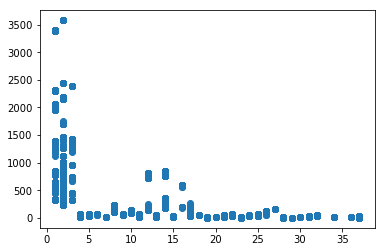

In [200]:
plt.scatter(data.ProductSubcategoryID,data.UnitPrice)
# ProductSubcategory ID 1-5 are costly items

In [201]:
df = data[["RevisionNumber","delayed","OnlineOrderFlag","SubTotal","TaxAmt","Freight","TotalDue","ProductSubcategoryID","OrderQty","ProductID","UnitPrice","UnitPriceDiscount","LineTotal","MakeFlag","FinishedGoodsFlag","SafetyStockLevel","ReorderPoint","StandardCost","ListPrice","DaysToManufacture"]]

In [202]:
df.isnull().sum()

RevisionNumber          0
delayed                 0
OnlineOrderFlag         0
SubTotal                0
TaxAmt                  0
Freight                 0
TotalDue                0
ProductSubcategoryID    0
OrderQty                0
ProductID               0
UnitPrice               0
UnitPriceDiscount       0
LineTotal               0
MakeFlag                0
FinishedGoodsFlag       0
SafetyStockLevel        0
ReorderPoint            0
StandardCost            0
ListPrice               0
DaysToManufacture       0
dtype: int64

In [203]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = le.fit_transform(df[i])

In [204]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=4)
# slice matrix so we only include the 0/1 indicator columns in the clustering
clusters = cluster.fit_predict(df)
data['cluster'] = clusters
data.cluster.value_counts()

0    43434
3    22451
1    12762
2     5801
Name: cluster, dtype: int64

In [248]:
#from sklearn.metrics import silhouette_score
#ss = silhouette_score(df,clusters)
#ss

MemoryError: 

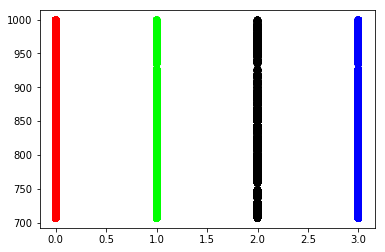

In [206]:
import matplotlib.pyplot as plt
%matplotlib inline
colormap = np.array(['red', 'lime', 'black','blue'])
plt.scatter(data.cluster,data.ProductID,c=colormap[data.cluster], s=40)
plt.show()

In [207]:
data.columns

Index(['SalesOrderID', 'RevisionNumber', 'delayed', 'OnlineOrderFlag',
       'CustomerID', 'SalesPersonID', 'CreditCardID', 'SubTotal', 'TaxAmt',
       'Freight', 'TotalDue', 'SalesOrderDetailID', 'OrderQty', 'ProductID',
       'SpecialOfferID', 'UnitPrice', 'UnitPriceDiscount', 'LineTotal', 'Name',
       'ProductNumber', 'MakeFlag', 'FinishedGoodsFlag', 'Color',
       'SafetyStockLevel', 'ReorderPoint', 'StandardCost', 'ListPrice', 'Size',
       'SizeUnitMeasureCode', 'WeightUnitMeasureCode', 'weights',
       'DaysToManufacture', 'ProductLine', 'Class', 'Style',
       'ProductSubcategoryID', 'ProductModelID', 'Title', 'Suffix',
       'EmailPromotion', 'cluster'],
      dtype='object')

In [208]:
c1 = data[data.cluster == 0]
c2 = data[data.cluster == 1]
c3 = data[data.cluster == 2]
c4 = data[data.cluster == 3]

In [209]:
c1.describe()

,SalesOrderID,RevisionNumber,delayed,OnlineOrderFlag,CustomerID,SalesPersonID,CreditCardID,SubTotal,TaxAmt,Freight,...,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,weights,DaysToManufacture,ProductSubcategoryID,ProductModelID,EmailPromotion,cluster
count,43434.000000,43434.000000,43434.000000,43434.000000,43434.000000,10061.000000,42062.000000,43434.000000,43434.000000,43434.000000,...,43434.000000,43434.000000,43434.000000,43434.000000,1.626600e+04,43434.000000,43434.000000,43434.000000,42062.000000,43434.0
mean,54595.042685,8.001980,0.381959,0.768361,21195.584703,280.320644,9760.657838,2461.235937,227.464905,71.082802,...,146.633329,109.974997,390.530710,659.493538,3.699653e+06,1.377607,19.556292,53.499816,0.632947,0.0
std,5495.101124,0.044454,0.485872,0.421884,6752.822748,4.728111,5600.291895,3596.705341,363.827858,113.696200,...,194.267262,145.700446,621.201673,1042.334953,1.488201e+06,1.855371,13.954365,39.898695,0.775018,0.0
min,43660.000000,8.000000,0.000000,0.000000,11000.000000,274.000000,1.000000,1.374000,0.109900,0.034400,...,4.000000,3.000000,0.856500,2.290000,8.800000e+01,0.000000,1.000000,1.000000,0.000000,0.0
25%,50708.000000,8.000000,0.000000,1.000000,14584.000000,277.000000,4983.000000,75.516000,6.077600,1.899300,...,4.000000,3.000000,6.922300,8.990000,3.104812e+06,0.000000,2.000000,25.000000,0.000000,0.0
50%,54902.500000,8.000000,0.000000,1.000000,20983.000000,279.000000,9775.500000,1174.480000,94.677600,29.586800,...,100.000000,75.000000,15.670900,37.990000,3.985159e+06,0.000000,21.000000,33.000000,0.000000,0.0
75%,59241.750000,8.000000,1.000000,1.000000,28871.000000,283.000000,14612.000000,2479.940000,199.379600,62.306125,...,100.000000,75.000000,486.706600,782.990000,4.791630e+06,4.000000,31.000000,92.000000,1.000000,0.0
max,63552.000000,9.000000,1.000000,1.000000,30117.000000,290.000000,19235.000000,17871.445200,2852.676600,891.461400,...,500.000000,375.000000,2171.294200,3578.270000,6.156270e+06,4.000000,37.000000,128.000000,2.000000,0.0


In [210]:
c2.describe()

,SalesOrderID,RevisionNumber,delayed,OnlineOrderFlag,CustomerID,SalesPersonID,CreditCardID,SubTotal,TaxAmt,Freight,...,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,weights,DaysToManufacture,ProductSubcategoryID,ProductModelID,EmailPromotion,cluster
count,12762.000000,12762.0,12762.000000,12762.0,12762.000000,12762.000000,12762.000000,12762.000000,12762.000000,12762.000000,...,12762.000000,12762.000000,12762.000000,12762.000000,8.246000e+03,12762.000000,12762.000000,12762.000000,12762.000000,12762.0
mean,50700.551873,8.0,0.953064,0.0,29788.539806,280.483858,9890.881445,60179.333218,5850.322039,1828.225637,...,203.335527,152.501646,463.243913,782.949864,2.791751e+06,1.932612,11.570914,31.842344,0.669958,1.0
std,4587.275725,0.0,0.211511,0.0,192.063131,5.040570,5845.288278,9847.414145,966.618309,302.068221,...,209.685897,157.264423,539.457777,901.939034,2.033801e+06,1.729901,9.662425,29.291855,0.817864,0.0
min,43869.000000,8.0,0.000000,0.0,29486.000000,274.000000,12.000000,46703.154800,4506.057200,1408.142900,...,4.000000,3.000000,0.856500,2.290000,8.800000e+01,0.000000,1.000000,1.000000,0.000000,1.0
25%,47045.000000,8.0,1.000000,0.0,29617.000000,276.000000,4623.000000,51324.194500,4963.716800,1551.161500,...,4.000000,3.000000,35.959600,59.990000,5.499601e+05,0.000000,2.000000,11.000000,0.000000,1.0
50%,49501.000000,8.0,1.000000,0.0,29770.000000,279.000000,10395.000000,57950.204400,5627.096400,1758.467600,...,100.000000,75.000000,204.625100,348.760000,3.310021e+06,1.000000,12.000000,26.000000,0.000000,1.0
75%,53514.000000,8.0,1.000000,0.0,29957.000000,283.000000,15090.000000,68404.626000,6689.021600,2090.319200,...,500.000000,375.000000,713.079800,1120.490000,4.190368e+06,4.000000,19.000000,34.000000,1.000000,1.0
max,63285.000000,8.0,1.000000,0.0,30117.000000,290.000000,19154.000000,80097.995000,7848.458700,2452.643300,...,500.000000,375.000000,2171.294200,3578.270000,6.156270e+06,4.000000,37.000000,128.000000,2.000000,1.0


In [211]:
c3.describe()

,SalesOrderID,RevisionNumber,delayed,OnlineOrderFlag,CustomerID,SalesPersonID,CreditCardID,SubTotal,TaxAmt,Freight,...,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,weights,DaysToManufacture,ProductSubcategoryID,ProductModelID,EmailPromotion,cluster
count,5801.000000,5801.0,5801.000000,5801.0,5801.000000,5801.000000,5801.000000,5801.000000,5801.000000,5801.000000,...,5801.000000,5801.000000,5801.000000,5801.000000,3.966000e+03,5801.000000,5801.000000,5801.000000,5801.000000,5801.0
mean,50155.324082,8.0,0.963282,0.0,29807.326495,281.612998,10140.022582,100471.604473,9853.658224,3079.268199,...,212.612308,159.459231,482.550860,810.139942,2.663534e+06,1.991208,11.318566,30.375453,0.722289,2.0
std,3887.051896,0.0,0.188084,0.0,186.065806,5.664350,5964.210912,17183.390248,1862.067414,581.896071,...,210.723339,158.042504,534.999613,890.410297,1.992888e+06,1.716178,9.519773,27.405915,0.821018,0.0
min,43875.000000,8.0,0.000000,0.0,29497.000000,274.000000,204.000000,80512.221900,7743.503700,2419.844900,...,4.000000,3.000000,0.856500,2.290000,8.800000e+01,0.000000,1.000000,1.000000,0.000000,2.0
25%,47365.000000,8.0,1.000000,0.0,29641.000000,276.000000,4830.000000,88446.796800,8581.177500,2681.618000,...,4.000000,3.000000,38.492300,69.990000,5.089183e+05,0.000000,2.000000,11.000000,0.000000,2.0
50%,49837.000000,8.0,1.000000,0.0,29722.000000,281.000000,10832.000000,96577.143000,9373.737700,2929.293000,...,100.000000,75.000000,308.217900,539.990000,3.164323e+06,1.000000,12.000000,26.000000,0.000000,2.0
75%,51783.000000,8.0,1.000000,0.0,29994.000000,289.000000,14928.000000,104958.806800,10427.250500,3258.515800,...,500.000000,375.000000,713.079800,1120.490000,4.083659e+06,4.000000,18.000000,33.000000,1.000000,2.0
max,63291.000000,8.0,1.000000,0.0,30117.000000,290.000000,18930.000000,163930.394300,17948.518600,5608.912100,...,500.000000,375.000000,1912.154400,3399.990000,6.156270e+06,4.000000,37.000000,128.000000,2.000000,2.0


In [212]:
c4.describe()

,SalesOrderID,RevisionNumber,delayed,OnlineOrderFlag,CustomerID,SalesPersonID,CreditCardID,SubTotal,TaxAmt,Freight,...,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,weights,DaysToManufacture,ProductSubcategoryID,ProductModelID,EmailPromotion,cluster
count,22451.000000,22451.0,22451.000000,22451.0,22451.000000,22451.000000,22326.000000,22451.000000,22451.000000,22451.000000,...,22451.000000,22451.000000,22451.000000,22451.000000,1.453200e+04,22451.000000,22451.000000,22451.000000,22326.000000,22451.0
mean,51394.585275,8.0,0.919157,0.0,29820.273128,280.549998,9875.382111,33312.428452,3236.657143,1011.455360,...,198.577703,148.933277,479.042688,822.097658,3.043691e+06,2.026725,11.005390,31.582335,0.601048,3.0
std,5375.091345,0.0,0.272600,0.0,186.836629,4.806448,5663.872779,7673.269488,774.278353,241.961985,...,206.098951,154.574213,554.697804,943.673255,2.056565e+06,1.742435,9.651671,29.058022,0.762196,0.0
min,43659.000000,8.0,0.000000,0.0,29484.000000,274.000000,8.000000,17671.844700,1719.971900,537.491200,...,4.000000,3.000000,0.856500,2.290000,8.800000e+01,0.000000,1.000000,1.000000,0.000000,3.0
25%,47396.000000,8.0,1.000000,0.0,29667.000000,277.000000,5215.000000,26985.262500,2642.950100,825.921900,...,4.000000,3.000000,35.959600,61.920000,5.745852e+05,0.000000,2.000000,12.000000,0.000000,3.0
50%,50217.000000,8.0,1.000000,0.0,29827.000000,279.000000,10146.000000,33608.064000,3240.939700,1012.793600,...,100.000000,75.000000,204.625100,404.990000,3.720439e+06,1.000000,12.000000,26.000000,0.000000,3.0
75%,55259.000000,8.0,1.000000,0.0,29956.000000,283.000000,14814.000000,39731.712000,3833.431000,1197.947200,...,500.000000,375.000000,739.041000,1214.850000,4.877818e+06,4.000000,19.000000,34.000000,1.000000,3.0
max,63293.000000,8.0,1.000000,0.0,30118.000000,290.000000,19181.000000,46694.236300,8050.153900,2515.673100,...,500.000000,375.000000,2171.294200,3578.270000,6.156270e+06,4.000000,37.000000,128.000000,2.000000,3.0


In [213]:
c1.delayed.value_counts(normalize=True)

0    0.618041
1    0.381959
Name: delayed, dtype: float64

In [180]:
c2.delayed.value_counts(normalize=True)

1    0.919157
0    0.080843
Name: delayed, dtype: float64

In [181]:
c3.delayed.value_counts(normalize=True)

1    0.963282
0    0.036718
Name: delayed, dtype: float64

In [216]:
c4.delayed.value_counts(normalize=True)
print ("Majority of the products which are delayed are in cluster 1,2,3")

Majority of the products which are delayed are in cluster 1,2,3


In [231]:
c1.SubTotal.min()

1.3740000000000001

In [232]:
c1.SubTotal.max()

17871.445199999998

In [233]:
c1.ProductID.min()

707

In [234]:
c2.ProductID.min()

707

In [235]:
c1.StandardCost.max()

2171.2941999999998

In [236]:
c1.StandardCost.min()

0.85650000000000004

In [239]:
c1.ProductLine.value_counts()
#Most of thr products are shipped through Road and Standard shipping in cluster0

S     14509
R     14090
M     11758
T      2876
Name: ProductLine, dtype: int64

In [243]:
c2.ProductLine.value_counts()
# most of the product are shipped on road and almost equal no.of products through mountain and standard in cluster 1

R     4703
S     3194
M     3146
T     1229
Name: ProductLine, dtype: int64

In [245]:
c3.ProductLine.value_counts()
#Majority  of the products are shipped through road in cluster 2

R     2545
S     1339
M     1234
T      537
Name: ProductLine, dtype: int64

In [247]:
c4.ProductLine.value_counts()
#majority of the products are shipped on mountain in cluster 3

M     7907
R     6816
S     5135
T     1754
Name: ProductLine, dtype: int64

In [253]:
c1.MakeFlag.value_counts(normalize=True)
# Majority of the products are purchased in cluster 0

0    0.624488
1    0.375512
Name: MakeFlag, dtype: float64

In [250]:
c2.MakeFlag.value_counts()
# Majority of the products are manufactured in-house in cluster 1

1    8689
0    4073
Name: MakeFlag, dtype: int64

In [251]:
c3.MakeFlag.value_counts()
# Majority of the products are manufactured in-house in cluster 2

1    4130
0    1671
Name: MakeFlag, dtype: int64

In [252]:
c4.MakeFlag.value_counts()
# Majority of the products are manufacuted in-house in cluster 3

1    15497
0     6954
Name: MakeFlag, dtype: int64

In [255]:
c1.SafetyStockLevel.value_counts(normalize=True)
# majority of the projects in cluster 0 doesn't have minimum inventory quantity

4      0.446494
100    0.329765
500    0.223742
Name: SafetyStockLevel, dtype: float64

In [257]:
c2.SafetyStockLevel.value_counts(normalize=True)
#Majority of the products in cluster 1 are costly and have minimum inventory  quantity if 100

100    0.395079
500    0.325419
4      0.279502
Name: SafetyStockLevel, dtype: float64

In [258]:
c3.SafetyStockLevel.value_counts(normalize=True)
#Majority of the products are costly and have minimum inventory quantity of 100

100    0.405103
500    0.342182
4      0.252715
Name: SafetyStockLevel, dtype: float64

In [266]:
c1.ReorderPoint.value_counts(normalize=True)
#Majority of the prodcuts in Cluster 0 are cheap 

3      0.446494
75     0.329765
375    0.223742
Name: ReorderPoint, dtype: float64

In [267]:
c2.ReorderPoint.value_counts()
#Majority of the products on cluster 1 is costly

75     5042
375    4153
3      3567
Name: ReorderPoint, dtype: int64

In [268]:
c3.ReorderPoint.value_counts()
#Majority of the products on cluster are is costly

75     2350
375    1985
3      1466
Name: ReorderPoint, dtype: int64

In [269]:
c4.ReorderPoint.value_counts()#Majority of the products in clsuter 3 are costlt

75     9457
375    6977
3      6017
Name: ReorderPoint, dtype: int64